for intellisense on python language server, need add this line to the top of the file

```python
from sage.all import *
```

In [21]:
from sage.all import *

factor(2025)

3^4 * 5^2

In [2]:
finiteField = GF(25)
x = var("x")  # Using sage's `var` function.
y = sin(x)  # Checking the type of `y` here will give you the sage `Expression` type
a = RealNumber(1.0)  # This is a sage `RealDoubleElement` type

In [3]:
show(plot3d(lambda u, v: (u ^ 2 + v ^ 2) / 4 - 2, (-2, 2), (-2, 2), online=False))

Graphics3d Object

In [4]:
N(sqrt(pi), digits=10)
numerical_approx(sqrt(pi), digits=10)

1.772453851

In [5]:
A = matrix(
    ZZ,
    9,
    [
        5,
        0,
        0,
        0,
        8,
        0,
        0,
        4,
        9,
        0,
        0,
        0,
        5,
        0,
        0,
        0,
        3,
        0,
        0,
        6,
        7,
        3,
        0,
        0,
        0,
        0,
        1,
        1,
        5,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        2,
        0,
        8,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        8,
        7,
        0,
        0,
        0,
        0,
        4,
        1,
        5,
        0,
        0,
        3,
        0,
        0,
        0,
        2,
        0,
        0,
        0,
        4,
        9,
        0,
        0,
        5,
        0,
        0,
        0,
        3,
    ],
)

sudoku(A)

[5 1 3 6 8 7 2 4 9]
[8 4 9 5 2 1 6 3 7]
[2 6 7 3 4 9 5 8 1]
[1 5 8 4 6 3 9 7 2]
[9 7 4 2 1 8 3 6 5]
[3 2 6 7 9 5 4 1 8]
[7 8 2 9 3 4 1 5 6]
[6 3 5 1 7 2 8 9 4]
[4 9 1 8 5 6 7 2 3]

## Basic Algebra and Calculus

In [6]:
u = var("u")
diff(sin(u), u)

cos(u)

In [7]:
x, a, b, c = var("x a b c")
solve([a * x ^ 2 + b * x + c == 0], x)

[x == -1/2*(b + sqrt(b^2 - 4*a*c))/a, x == -1/2*(b - sqrt(b^2 - 4*a*c))/a]

In [8]:
x, y, p, q = var("x y p q")
eq1 = p + q == 9
eq2 = q * y + p * x == -6
eq3 = q * y ^ 2 + p * x ^ 2 == 24
solve([eq1, eq2, eq3, p == 1], p, q, x, y)
solns = solve([eq1, eq2, eq3, p == 1], p, q, x, y, solution_dict=True)
[[N(s[p], 30), s[q].n(30), s[x].n(30), s[y].n(30)] for s in solns]

[[1.0000000, 8.0000000, -4.8830369, -0.13962039],
 [1.0000000, 8.0000000, 3.5497035, -1.1937129]]

In [9]:
phi = var("phi")
find_root(cos(phi) == sin(phi), 0, pi / 2)

0.7853981633974484

In [10]:
x, y = var("x, y")
f = x ^ 2 + 17 * y ^ 2
f.diff(x, 1)

2*x

## Solving Differential Equations

``` bash
|------\/\/\/\/\---|mass1|----\/\/\/\/\/----|mass2|
         spring1               spring2
```

$m_1x_1''+(k_1+k_2)x_1-k_2x_2=0 \\$
$m_2x_2''+k_2(x_2-x_1)=0 \\$
$m_1=2,m_2=1,k_1=4,k_2=2,x_1(0)=3,x_1'(0)=0,x_2(0)=3,x_2'(0)=0$


In [27]:
# y = x_2
t, s = SR.var("t,s")
# mass1 equation
x = function("x")(t)
y = function("y")(t)
f = 2 * x.diff(t, 2) + 6 * x - 2 * y
f.laplace(t, s)

2*s^2*laplace(x(t), t, s) - 2*s*x(0) + 6*laplace(x(t), t, s) - 2*laplace(y(t), t, s) - 2*D[0](x)(0)

$-2x'(0)+2s^2\cdot X(s)-2sx(0)-2Y(s)+6X(s)=0$  

In [28]:
de2 = maxima("diff(y(t),t, 2) + 2*y(t) - 2*x(t)")
lde2 = de2.laplace("t","s"); lde2.sage()

s^2*laplace(y(t), t, s) - s*y(0) - 2*laplace(x(t), t, s) + 2*laplace(y(t), t, s) - D[0](y)(0)

$-Y'(0)+s^2Y(s)+2Y(s)-2X(s)-sy(0)=0$

In [35]:
# plug in the initial conditions x(0) = 3, x'(0) = 0 and y(0) = 3, y'(0) = 0
s, X, Y = var("s X Y")
eqns = [(2 * s ^ 2 + 6) * X - 2 * Y == 6 * s, -2 * X + (s ^ 2 + 2) * Y == 3 * s]
solve(eqns, X, Y)

[[X == 3*(s^3 + 3*s)/(s^4 + 5*s^2 + 4), Y == 3*(s^3 + 5*s)/(s^4 + 5*s^2 + 4)]]

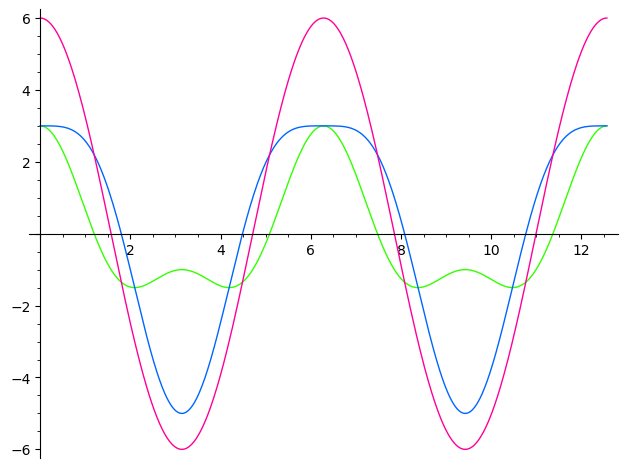

In [44]:
s, t = var("s t")
x_1 = inverse_laplace((3 * s ^ 3 + 9 * s) / (s ^ 4 + 5 * s ^ 2 + 4), s, t)
x_2 = inverse_laplace((3 * s ^ 3 + 15 * s) / (s ^ 4 + 5 * s ^ 2 + 4), s, t)
p1 = plot(x_1, (t, 0, 4 * pi), rgbcolor=hue(0.3))
p2 = plot(x_2, (t, 0, 4 * pi), rgbcolor=hue(0.6))
p3 = plot(x_1 + x_2, (t, 0, 4 * pi), rgbcolor=hue(0.9))
show(p1 + p2 + p3)